In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

plt.rcParams["figure.figsize"] = [12,6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('energy_consumption.csv', index_col=0)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
df.shape

(19735, 29)

In [5]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df = df.rename(columns = {'date' : 'date_time', 
                            'Appliances' : 'a_energy', 
                            'lights' : 'l_energy', 
                            'T1' : 'kitchen_temp', 
                            'RH_1' : 'kitchen_hum', 
                            'T2' : 'liv_temp', 
                            'RH_2' : 'liv_hum', 
                            'T3' : 'laun_temp', 
                            'RH_3' : 'laun_hum', 
                            'T4' : 'off_temp', 
                            'RH_4' : 'off_hum', 
                            'T5' : 'bath_temp', 
                            'RH_5' : 'bath_hum', 
                            'T6' : 'out_b_temp', 
                            'RH_6' : 'out_b_hum', 
                            'T7' : 'iron_temp', 
                            'RH_7' : 'iron_hum', 
                            'T8' : 'teen_temp', 
                            'RH_8' : 'teen_hum', 
                            'T9' : 'par_temp', 
                            'RH_9' : 'par_hum', 
                            'T_out' : 'out_temp', 
                            'Press_mm_hg' : 'out_press', 
                            'RH_out' : 'out_hum', 
                            'Windspeed' : 'wind', 
                            'Visibility' : 'visibility', 
                            'Tdewpoint' : 'dew_point', 
                            'rv1' : 'rv1', 
                            'rv2' : 'rv2'})

In [7]:
df.head()

,date_time,a_energy,l_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a_energy,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
l_energy,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
kitchen_temp,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
kitchen_hum,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
liv_temp,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
liv_hum,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
laun_temp,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
laun_hum,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
off_temp,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
off_hum,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


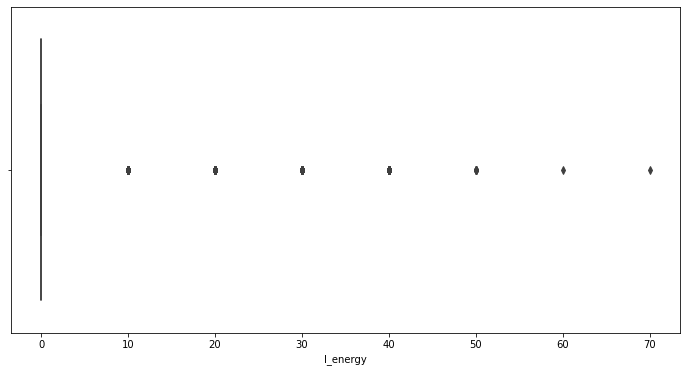

In [9]:
sns.boxplot(data=df, x='l_energy')
plt.show()

In [10]:
df.l_energy.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: l_energy, dtype: int64

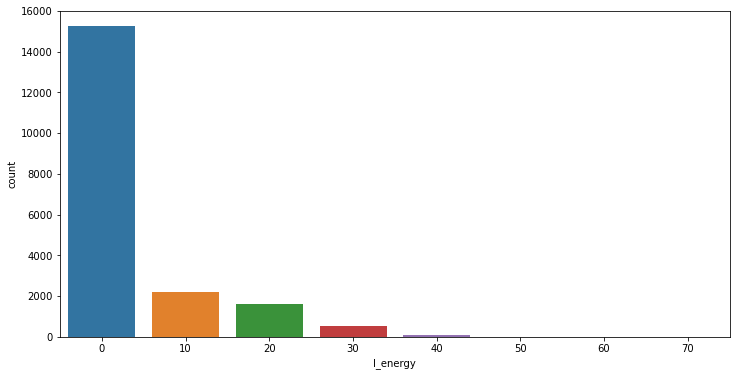

In [11]:
sns.countplot(data=df, x='l_energy')
plt.show()

In [12]:
df.l_energy.value_counts(normalize=True) * 100

0     77.284013
10    11.208513
20     8.229035
30     2.832531
40     0.390170
50     0.045604
70     0.005067
60     0.005067
Name: l_energy, dtype: float64

- 77% of the instances have 0 Wh. This renders the l_energy column quite useless because we can't possibly find any links between it and the other data. So, let's get rid of this column.

In [13]:
energy_df = df.copy()

energy_df = energy_df.drop('l_energy', 1)

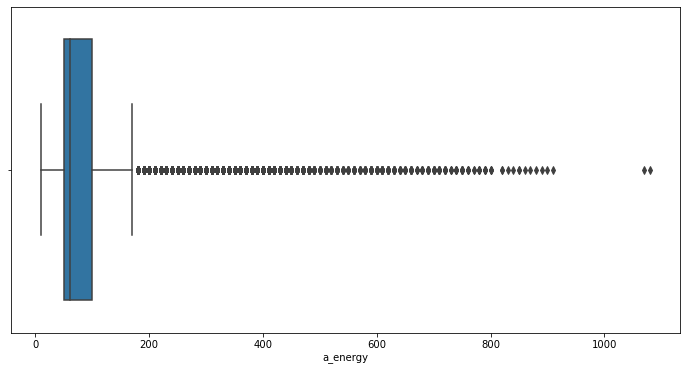

In [14]:
sns.boxplot(data=energy_df, x='a_energy')
plt.show()

In [15]:
(energy_df.a_energy > 200).sum()

1916

In [16]:
(energy_df.a_energy > 200).sum() / len(energy_df)

0.09708639473017482

 -  close to 10% of the instances have a_energy above 200 Wh. The decision to remove these instances will differ from analyst to analyst, and also on the task at hand. You may decide to keep them, but in this chapter, we are going to delete them. You are encouraged to keep them in a separate set and see the impact this has on the rest of the analysis.

In [17]:
new_data = energy_df.loc[(energy_df.a_energy > 200)]
new_data

,date_time,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
10,2016-01-11 18:40:00,230,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,18.89,46.430000,...,17.000000,45.290000,5.966667,734.366667,91.333333,5.666667,40.000000,4.633333,10.298729,10.298729
11,2016-01-11 18:50:00,580,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.00,46.430000,...,16.890000,45.290000,5.983333,734.433333,91.166667,5.833333,40.000000,4.616667,8.827838,8.827838
12,2016-01-11 19:00:00,430,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.00,46.363333,...,16.963333,45.290000,6.000000,734.500000,91.000000,6.000000,40.000000,4.600000,34.351142,34.351142
13,2016-01-11 19:10:00,250,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,19.00,47.223333,...,16.890000,45.326667,6.000000,734.616667,90.500000,6.000000,40.000000,4.516667,19.205186,19.205186
31,2016-01-11 22:10:00,400,21.533333,44.966667,20.790000,44.360000,20.426667,45.933333,19.60,47.500000,...,16.823333,44.530000,5.650000,735.883333,87.833333,6.166667,40.000000,3.716667,29.978291,29.978291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,2016-05-27 13:50:00,230,25.500000,47.133333,26.600000,41.000000,28.200000,41.796667,24.60,45.790000,...,23.100000,46.530000,21.850000,755.850000,59.166667,1.833333,22.333333,13.500000,5.773431,5.773431
19725,2016-05-27 16:30:00,220,25.426667,46.060000,26.000000,41.700000,28.000000,40.760000,24.70,45.400000,...,23.200000,46.700000,22.900000,755.350000,55.000000,2.500000,22.500000,13.300000,23.009520,23.009520
19732,2016-05-27 17:40:00,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [18]:
energy_df = energy_df.loc[~(energy_df.a_energy > 200)]
energy_df.shape

(17819, 28)

In [19]:
energy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
a_energy,17819.0,68.728324,31.378141,10.000000,50.000000,60.000000,80.000000,200.000000
kitchen_temp,17819.0,21.687676,1.605252,16.790000,20.760000,21.600000,22.600000,26.200000
kitchen_hum,17819.0,40.158323,3.933742,27.023333,37.260000,39.560000,42.900000,59.633333
liv_temp,17819.0,20.294921,2.172435,16.100000,18.790000,19.926667,21.472333,29.856667
liv_hum,17819.0,40.470961,4.062130,20.463333,37.930000,40.560000,43.326667,56.026667
laun_temp,17819.0,22.230049,1.971209,17.200000,20.790000,22.100000,23.290000,29.200000
laun_hum,17819.0,39.167393,3.223465,28.766667,36.826667,38.471429,41.590000,49.656667
off_temp,17819.0,20.858577,2.048053,15.100000,19.566667,20.666667,22.100000,26.200000
off_hum,17819.0,38.991000,4.324842,27.660000,35.500000,38.363333,42.090000,51.000000
bath_temp,17819.0,19.607705,1.838655,15.330000,18.290000,19.390000,20.600000,25.795000


In [20]:
energy_df.date_time = pd.to_datetime(energy_df.date_time)

In [21]:
energy_df['year'] = energy_df.date_time.dt.year
energy_df['month'] = energy_df.date_time.dt.month
energy_df['day'] = energy_df.date_time.dt.day
energy_df['day_of_week'] = energy_df.date_time.dt.day_of_week + 1

In [25]:
energy_df.set_index('date_time', inplace=True)

In [26]:
energy_df.head()

,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,...,out_hum,wind,visibility,dew_point,rv1,rv2,year,month,day,day_of_week
date_time,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,1
2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,1
2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,1
2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,1
2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,1


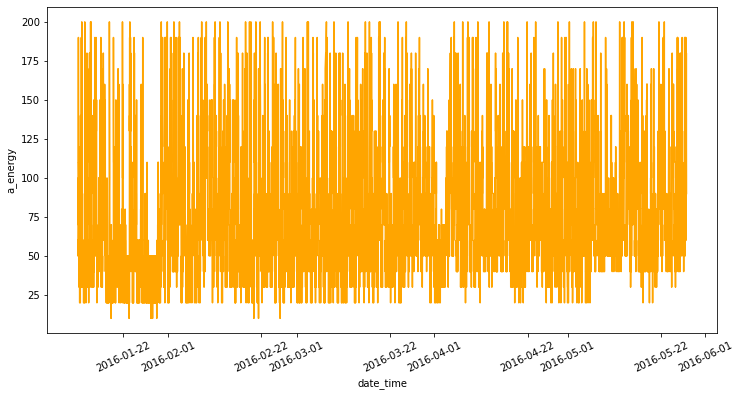

In [31]:
sns.lineplot(data=energy_df, x='date_time', y='a_energy', color='orange')

plt.xticks(rotation=25)
plt.show()

In [35]:
## monthly energy consumption

monthly_data = energy_df.groupby('month', as_index=False)['a_energy'].sum()
monthly_data.sort_values('a_energy', ascending=False)

,month,a_energy
2,3,283190
3,4,274030
4,5,259120
1,2,258270
0,1,150060


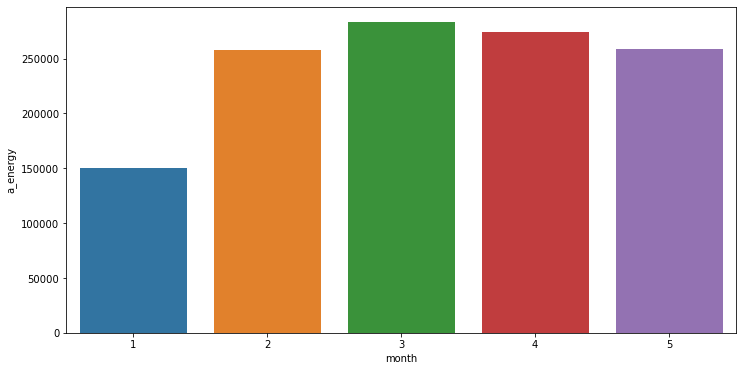

In [38]:
sns.barplot(data=monthly_data, x='month', y='a_energy')
plt.show()

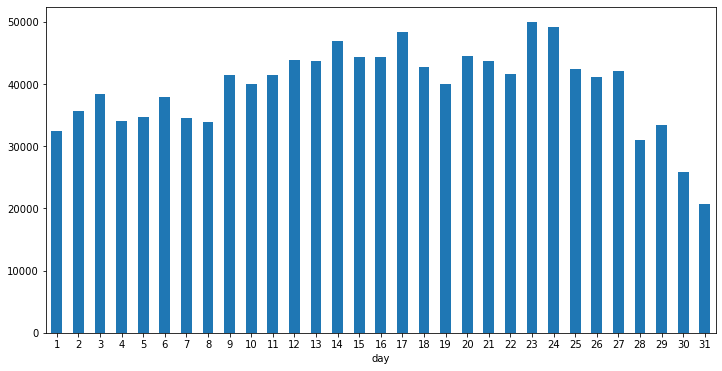

In [40]:
### Energy per day

daywise_consumption = energy_df.groupby('day')['a_energy'].sum()

daywise_consumption.plot.bar(rot=0)
plt.show()

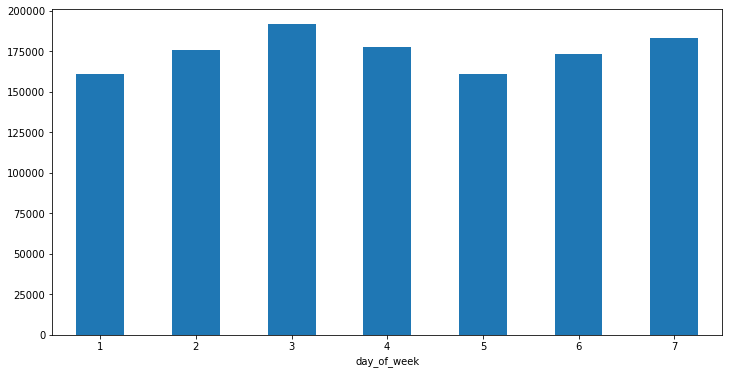

In [41]:
### Energy per day_of_week

plot_data = energy_df.groupby('day_of_week')['a_energy'].sum()

plot_data.plot.bar(rot=0)
plt.show()

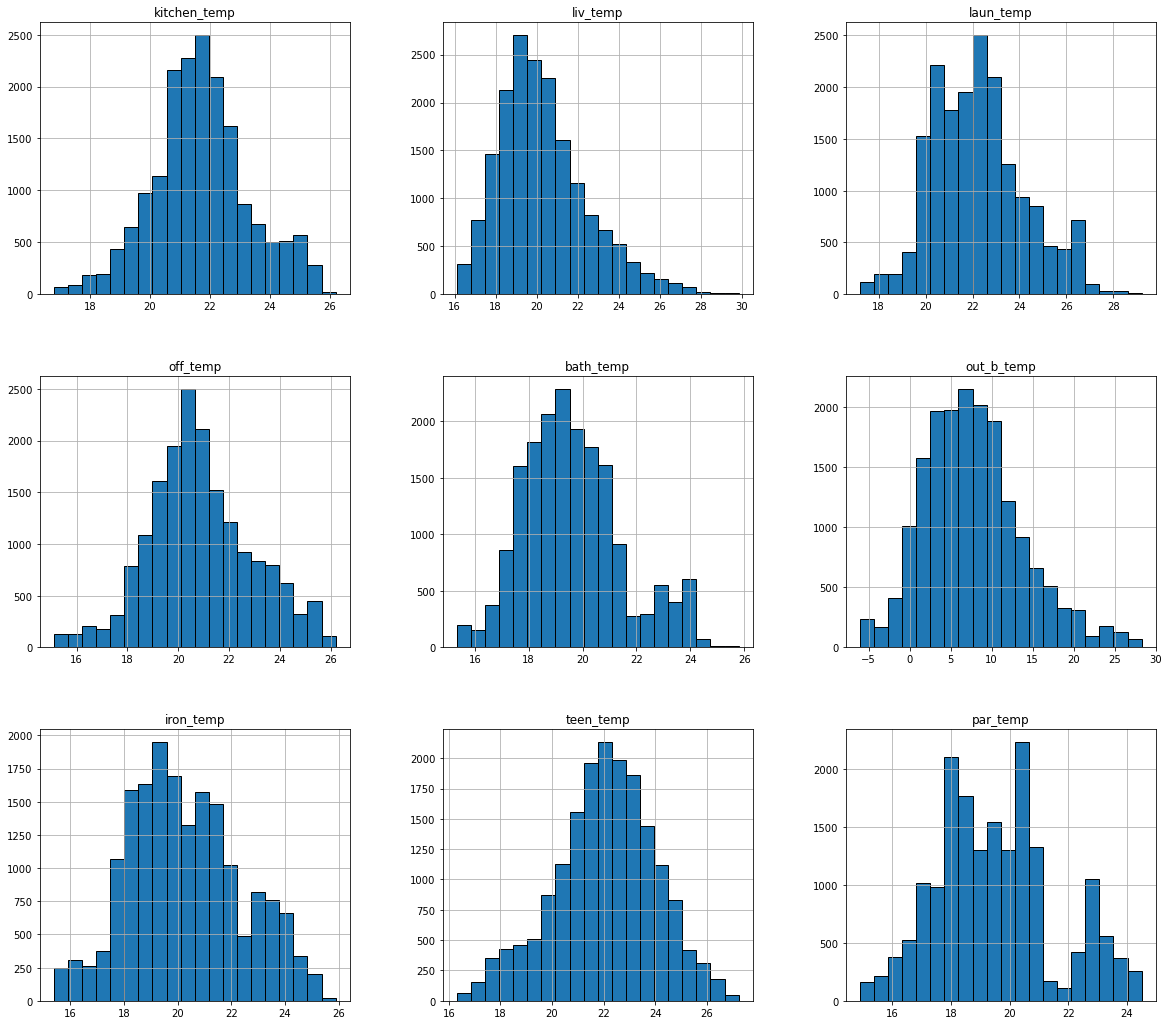

In [43]:
# distribution of temperature columns

col_temp = ['kitchen_temp', 'liv_temp', 'laun_temp',
            'off_temp', 'bath_temp', 'out_b_temp', 
            'iron_temp', 'teen_temp', 'par_temp']


energy_df[col_temp].hist(bins=20, ec='k', figsize=(20, 18))
plt.show()

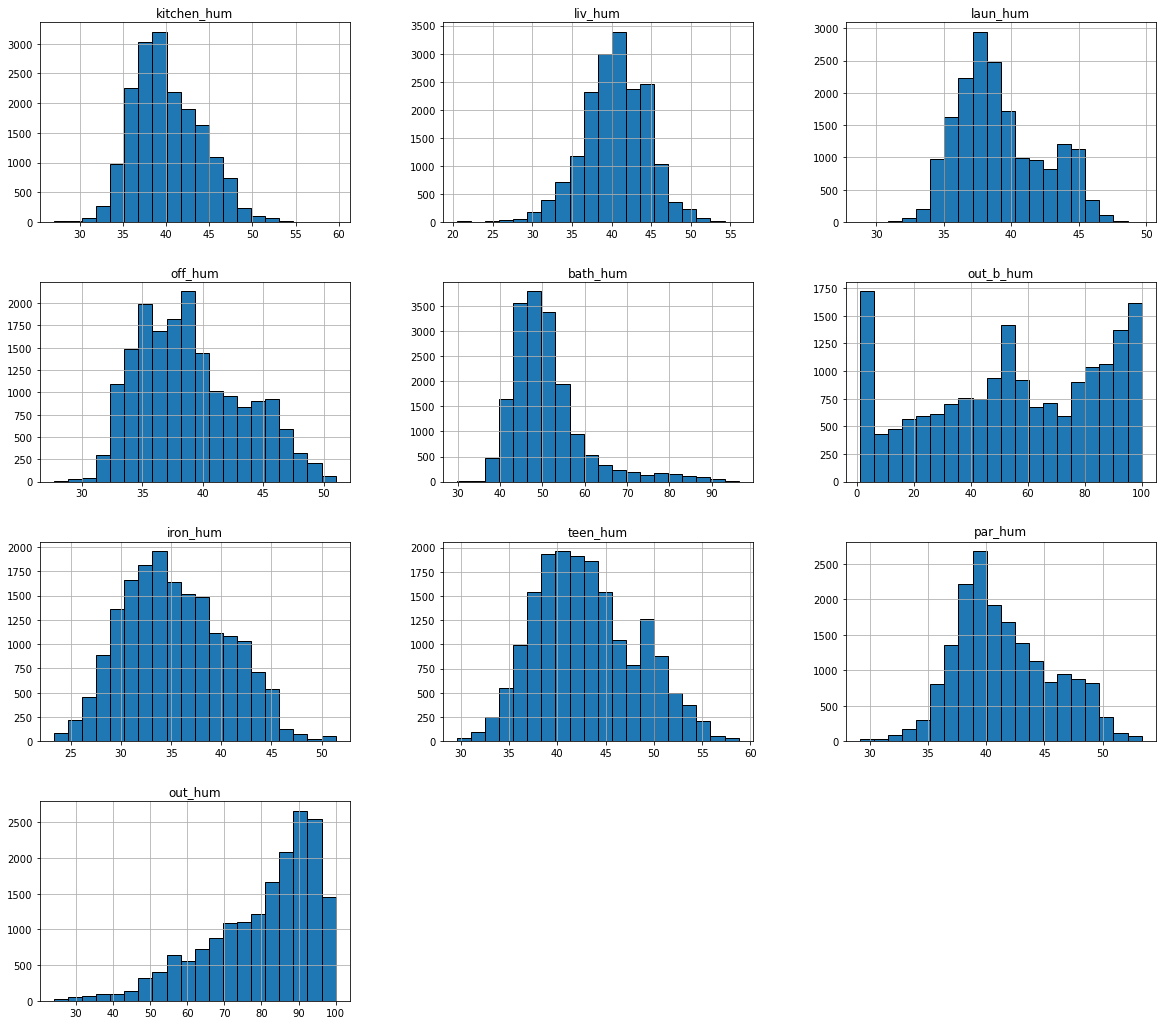

In [45]:
## distribution of humanity columns

hum_cols = energy_df.filter(like='hum').columns

energy_df[hum_cols].hist(bins=20, ec='k', figsize=(20, 18))
plt.show()

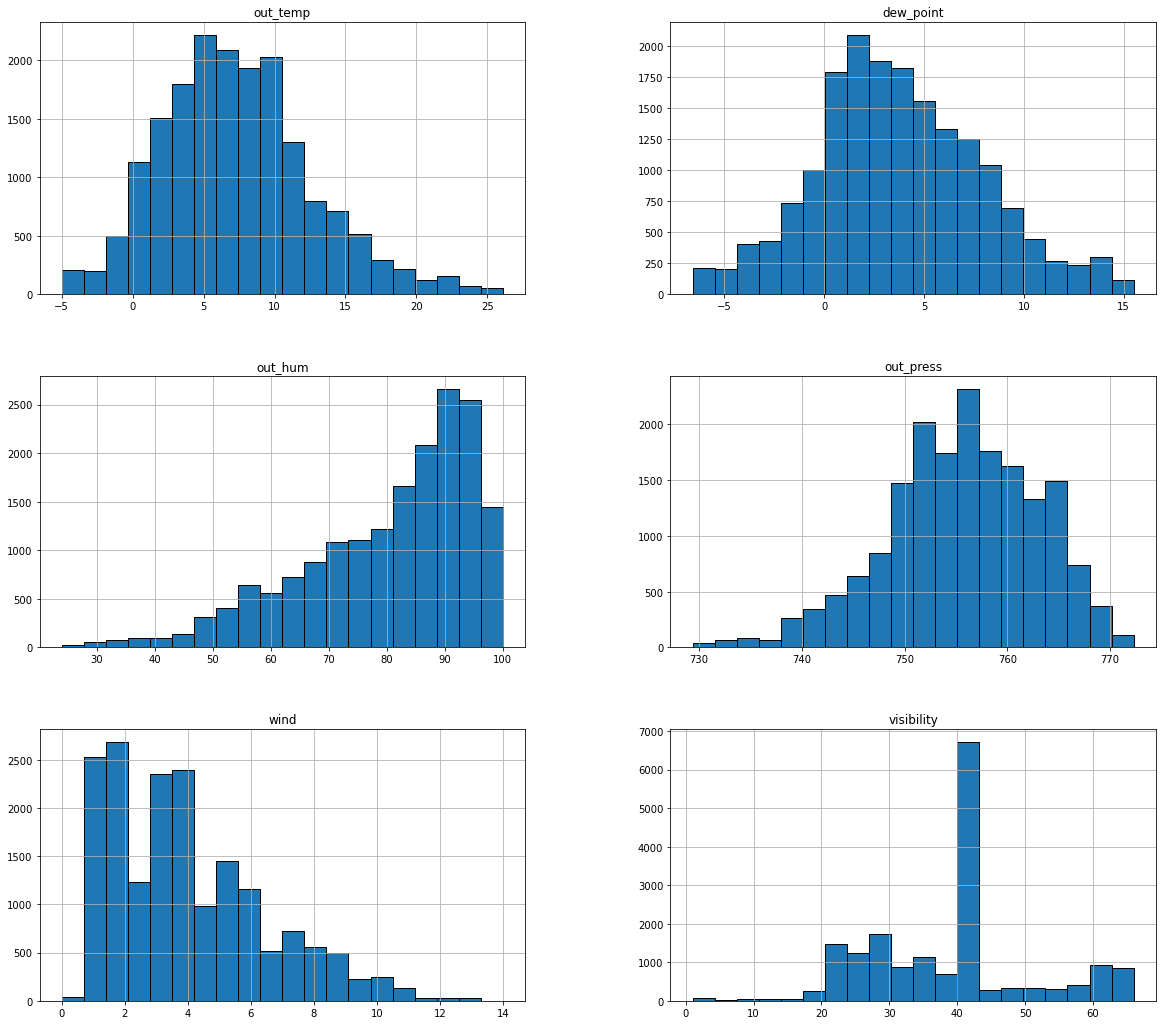

In [46]:
## Weather distribution

col_weather = ['out_temp', 'dew_point', 'out_hum', 'out_press', 'wind', 'visibility']

energy_df[col_weather].hist(bins=20, ec='k', figsize=(20, 18))
plt.show()

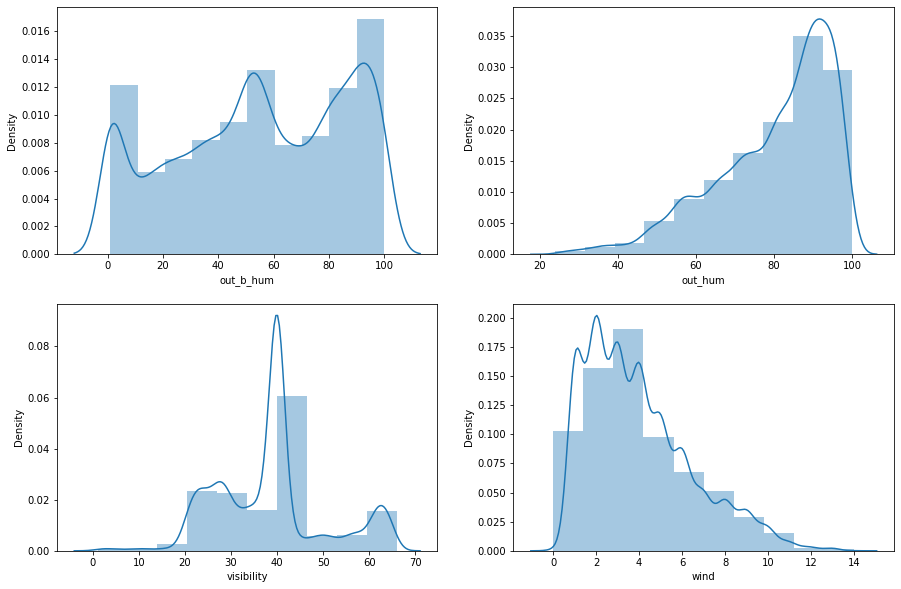

In [47]:
f, ax = plt.subplots(2, 2, figsize = (15, 10))

sns.distplot(energy_df["out_b_hum"], bins = 10, ax = ax[0][0])
sns.distplot(energy_df["out_hum"], bins = 10, ax = ax[0][1])
sns.distplot(energy_df["visibility"], bins = 10, ax = ax[1][0])
sns.distplot(energy_df["wind"], bins = 10, ax = ax[1][1])
plt.show()

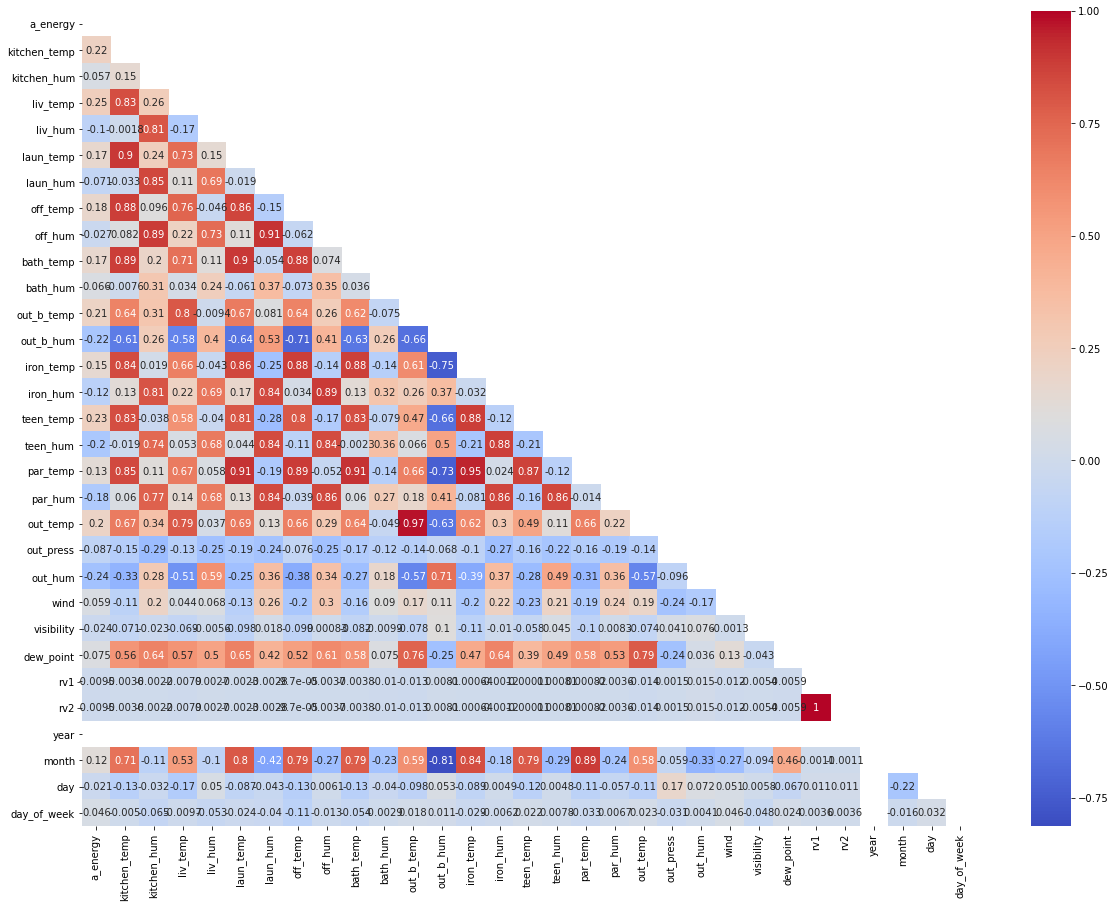

In [48]:
corr_matrix = energy_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.show()